## **Exploring Data Science Job Opportunities 🔍🚀**

Your mission is to design a specialized tool that extracts and analyzes data science job listings from a single online source of your choice. Focus on crafting a laser-focused web scraping solution tailored to the chosen platform, ensuring the collection of crucial details such as job titles, company names, experience requirements, salary ranges, and locations.

### **Key Tasks:**

1. **Source Selection:**
Choose a preferred online platform for data science job listings. Platforms like TimesJobs, LinkedIn Jobs, Indeed, Naukri, Glassdoor are potential options. Specify your chosen source in your solution. 🎯
2. **Web Scraping Precision:**
Engineer a targeted web scraping mechanism adept at extracting specific information from the chosen platform. ⚙️
3. **Data Extraction:**
Focus on extracting essential details from job listings, including but not limited to job titles, company names, required experience levels, salary ranges, and locations. 📊
4. **Data Organization:**
Ensure efficient organization and cleaning of the extracted data. The emphasis should be on presenting the information in a clear and understandable format.🧹
5. **Insights Generation:**
Develop tools for analyzing the gathered data to generate insights. Explore patterns related to job titles, experience requirements, salary distributions, and geographic preferences. 🔍
6. **Visualization:**
Create visual representations such as charts and graphs to communicate the insights effectively. Your visuals should provide a user-friendly interpretation of the data. 📈

# **Extracting Job information from HTML**

The provided Python code aims to extract specific information related to a job posting from an HTML structure. The information includes the job title, company name, experience requirements, salary details, and the job location.

*   **Importing Libraries:**
    The code begins by importing the BeautifulSoup class from the bs4 library. This library facilitates the parsing and manipulation of HTML content.

*   **HTML Content:**
    A sample HTML content string is provided, representing the structure of a job posting.

*   **Creating BeautifulSoup Object:**
    The HTML content is converted into a BeautifulSoup object (soup) using the 'lxml' parser. This object allows for easy navigation and extraction of specific elements from the HTML.

*   **Extracting Job Title and Company Name:**
    The job title and company name are extracted using the find method, targeting the 'h1' and 'h2' tags, respectively. The text.strip() method is applied to remove leading and trailing whitespaces.

*   **Extracting Experience:**
    The experience information is extracted by finding the first 'li' (list item) tag with no specific class. The text content within this tag is obtained using stripped_strings and joined together to form the experience string.

*   **Extracting Salary:**
    The salary information is extracted by finding the next 'li' tag after the one containing the experience details. The text.strip() method is applied to obtain the clean salary string.

*   **Extracting Location:**
    The location information is extracted by finding the next 'li' tag with a 'title' attribute after the salary tag. The value of the 'title' attribute is retrieved and cleaned using strip().

*   **Printing Extracted Information:**
    The extracted job information is printed to the console for verification.

In [1]:
from bs4 import BeautifulSoup

html = """
<div class="jd-header wht-shd-bx">
    <h1 class="jd-job-title">Senior Business Analyst</h1>
    <h2>vcarve rcm private limited</h2>
    <ul class="top-jd-dtl clearfix">
        <li><i class="material-icons">card_travel</i>2 to 3 yrs</li>
        <li><i class="material-icons rupee">&#8377;</i>As per Industry Standards</li>
        <li title="United States of America (USA) (United States Of America (usa))">
            <i class="material-icons">location_on</i>
            United States of America (USA) (United States Of America (usa))
        </li>
    </ul>
    <div class="top-job-action"></div>
</div>
"""

# Create a BeautifulSoup object, which represents the HTML document and allows you to interact with it
soup = BeautifulSoup(html, 'lxml')

# Extract Job Title and Company Name
job_title = soup.find('h1', class_='jd-job-title').text.strip()
company_name = soup.find('h2').text.strip()

# Extracting Experience
experience_tag = soup.find('li', {'class': None})  # Find the <li> tag with no specific class
experience = ''.join(experience_tag.stripped_strings)  # Join and concatenate the stripped strings inside the tag

# Extracting Salary
salary_tag = experience_tag.find_next('li')  # Find the next <li> tag after the Experience tag
salary = salary_tag.text.strip()  # Get the text content and remove leading/trailing whitespaces

# Extracting Location
location_tag = salary_tag.find_next('li', {'title': True})  # Find the next <li> tag with a 'title' attribute
location = location_tag.get('title').strip()  # Get the value of the 'title' attribute and remove leading/trailing whitespaces

# Print the extracted information
print(f"Job Title    : {job_title}")
print(f"Company Name : {company_name}")
print(f"Experience   : {experience}")
print(f"Salary       : {salary}")
print(f"Location     : {location}")


Job Title    : Senior Business Analyst
Company Name : vcarve rcm private limited
Experience   : card_travel2 to 3 yrs
Salary       : ₹As per Industry Standards
Location     : United States of America (USA) (United States Of America (usa))


# **Scraping the data from TimesJobs Website**

In [ ]:
# Import necessay Libraries
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re

# Function to extract and clean experience information
def extract_experience(experience_tag):
    if experience_tag:
        experience_text = ''.join(experience_tag.stripped_strings)
        return experience_clear(experience_text)
    else:
        return None

# Function to extract and clean salary information
def extract_salary(salary_tag):
    if salary_tag:
        salary_text = salary_tag.text.strip()
        return salary_clear(salary_text)
    else:
        return "₹ As per Industry Standards"

# Function to clean and format experience information
def experience_clear(experience_text):
    experience_pattern = re.compile(r'(\d+)\s*to\s*(\d+)\s*(?:yrs|Years)')
    matches = experience_pattern.search(experience_text)
    if matches:
        experience_start = matches.group(1)
        experience_end = matches.group(2)
        return f"{experience_start} - {experience_end} Yrs"
    else:
        return None
# Function to clean and format salary information
def salary_clear(salary_text):
    salary_pattern = re.compile(r'(\d+\.\d+)\s*-\s*(\d+\.\d+)\s*Lacs\s*p\.a\.')
    matches = salary_pattern.search(salary_text)
    if matches:
        salary_start = matches.group(1)
        salary_end = matches.group(2)
        return f"{salary_start} - {salary_end}"
    else:
        return "₹ As per Industry Standards"

# Function to scrape job information from TimesJobs Website
def scrape_jobs(pages=2):
    jobs_data = []

    for page in range(1, pages + 1):
        # Define the URL for job search
        url = f'https://www.timesjobs.com/candidate/job-search.html?from=submit&luceneResultSize=25&txtKeywords=0DQT0Data%20Analysis0DQT0,0DQT0business%20analyst0DQT0,0DQT0Data%20Science0DQT0&postWeek=60&searchType=personalizedSearch&actualTxtKeywords=0DQT0Data%20Analysis0DQT0,0DQT0business%20analyst0DQT0,0DQT0Data%20Science0DQT0&searchBy=0&rdoOperator=OR&pDate=I&sequence=2&startPage={page}'

        # Make a request to the URL and create a BeautifulSoup object
        html_file = requests.get(url)
        soup = BeautifulSoup(html_file.text, 'lxml')

        # Find all job listings on the page
        job_list = soup.find_all('li', class_='clearfix job-bx wht-shd-bx')

        # Iterate through each job listing
        for job_card in job_list:
            job = job_card.find('ul', class_='list-job-dtl clearfix')
            job_description = " ".join(job.find_all('li')[0].text.split())
            job_skills = "".join(job.find_all('li')[1].text.split())
            job_info = job_card.header.h2.a['href']
            published_date = job_card.find('span', class_='sim-posted').span.text

            # Extract details for each job
            details_url = job_card.header.h2.a['href']
            details_html = requests.get(details_url)
            details_soup = BeautifulSoup(details_html.text, 'lxml')

            job_title = details_soup.find('h1', class_='jd-job-title').text.strip()
            company_name = details_soup.find('h2').text.strip()

            # Extract experience information
            experience_tag = details_soup.find('ul', class_='top-jd-dtl clearfix').find('li', {'class': None})
            experience = extract_experience(experience_tag)

            # Extract salary information
            salary_tag = experience_tag.find_next('li')
            salary = extract_salary(salary_tag)

            # Extract location information
            location_tag = salary_tag.find_next('li', {'title': True})
            location = location_tag.get('title').strip()

            # Append job data to the list
            jobs_data.append({
                'Job Title': job_title,
                'Company Name': job_card.find('h3', class_='joblist-comp-name').text.replace('(More Jobs)', '').strip(),
                'Experience': experience,
                'Salary_lpa': salary,
                'Location': location,
                'Job Description': job_description.split(':')[1],
                'Job Required Skills': job_skills.replace('KeySkills:', ''),
                'Link': job_info,
                'Published date': published_date
            })
    return jobs_data


# Function to create a DataFrame from the scraped job data and save it to a CSV file
def create_dataframe(jobs_data):
    df = pd.DataFrame(jobs_data)
    # Write the dataframe to a CSV file
    df.to_csv('scraped_jobs.csv', index=False)
    return df

# Main function to orchestrate the entire process
def main():
    total_jobs = 100

    # Set the total number of job descriptions you want to fetch
    pages = (total_jobs + 24) // 25  # Calculate the number of pages needed

    job_data = scrape_jobs(pages)
    df_jobs = create_dataframe(job_data)

    print("DataFrame from Scraped Job Data:")
    print(df_jobs)

if __name__ == '__main__':
    main()


In [3]:
main_df = pd.read_csv("/content/scraped_jobs.csv")
main_df

,Job Title,Company Name,Experience,Salary_lpa,Location,Job Description,Job Required Skills,Link,Published date
0,Senior Business Analyst,vcarve rcm private limited,2 - 3 Yrs,₹ As per Industry Standards,United States of America (USA) (United States ...,Title,"dataanalysis,businessrequirements,businessproc...",https://www.timesjobs.com/job-detail/senior-bu...,Posted few days ago
1,Associate Business Analyst,Aexonic Technologies Private Limited,0 - 3 Yrs,₹ As per Industry Standards,Pune (Maharashtra),Educational Qualification,"businessprocessmodeling,dataanalysis,businessr...",https://www.timesjobs.com/job-detail/associate...,Posted few days ago
2,"Project Manager,Manager",Rohit Singh,1 - 6 Yrs,1.95 - 12.00,"Ahmedabad (Gujarat), Bengaluru/ Bangalore (Kar...",JOB IN CONSTRUCTION COMPANY Nahmuller Constru...,"ProjectManagement,operationsmanager,teamleader...",https://www.timesjobs.com/job-detail/project-m...,Posted today
3,Senior Technology Business Analyst,SRIJAN TECHNOLOGIES,3 - 6 Yrs,₹ As per Industry Standards,Gurgaon (Haryana),See all the jobs at Srijan Technologies PVT L...,"businessanalysis,datarequirements,technicalimp...",https://www.timesjobs.com/job-detail/senior-te...,Posted few days ago
4,Java and Dot Net Trainer,NARESH I TECHNOLOGIES,5 - 8 Yrs,3.00 - 5.00,Hyderabad/ Secunderabad (Andhra Pradesh),Salary - 3 - 5 LPAExperience - 5 to 8 yearsWe...,"java,Html,mySQL,trainer,webservice,datascience...",https://www.timesjobs.com/job-detail/java-and-...,Posted 2 days ago
...,...,...,...,...,...,...,...,...,...
95,Offline trainer - Data Science,NARESH I TECHNOLOGIES,5 - 10 Yrs,5.00 - 10.00,Hyderabad/ Secunderabad (Andhra Pradesh),We are looking for Full Stack Data ScienceTra...,"DataScience,ArtificialIntelligence,NaturalLang...",https://www.timesjobs.com/job-detail/offline-t...,Posted a month ago
96,directions_walk\r\n \r\n Data Science Intern...,Maxgen Technologies,0 - 1 Yrs,₹ As per Industry Standards,"Ahmedabad (Gujarat), Mehsana (Gujarat), Rajkot...",Maxgen Technologies pvt ltd offers live proje...,collegeproject,https://www.timesjobs.com/job-detail/data-scie...,Posted few days ago
97,directions_walk\r\n \r\n Data Science Intern...,Maxgen Technologies,0 - 1 Yrs,1.00 - 2.00,"Pune (Maharashtra), Amravati (Maharashtra), Au...",Maxgen Technologies pvt ltd offering internsh...,datascience,https://www.timesjobs.com/job-detail/data-scie...,Posted few days ago
98,directions_walk\r\n \r\n Data Science Intern...,Maxgen Technologies,0 - 1 Yrs,1.00 - 2.00,"Pune (Maharashtra), Jalgaon (Maharashtra), Kol...",Maxgen technologies Pvt ltd offers live proje...,.,https://www.timesjobs.com/job-detail/data-scie...,Posted few days ago


## **Data Standaradization**
Now, to make the visualisation easier, we will remoe some descrepancies from each feature so that the data is as standard as possible throughout the feature.

In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Job Title            100 non-null    object
 1   Company Name         100 non-null    object
 2   Experience           100 non-null    object
 3   Salary_lpa           100 non-null    object
 4   Location             100 non-null    object
 5   Job Description      100 non-null    object
 6   Job Required Skills  100 non-null    object
 7   Link                 100 non-null    object
 8   Published date       100 non-null    object
dtypes: object(9)
memory usage: 7.2+ KB


In [5]:
main_df['Published date'].unique()

array(['Posted few days ago', 'Posted today', 'Posted 2 days ago',
       'Posted 3 days ago', 'Posted a month ago', 'Posted 1 day ago'],
      dtype=object)

In [6]:
# Mapping function to convert 'Published date' to numerical values
def map_published_date_to_days(published_date):
    if 'today' in published_date.lower():
        return 0
    elif '1 day' in published_date.lower():
        return 1
    elif '2 days' in published_date.lower():
        return 2
    elif '3 days' in published_date.lower():
        return 3
    elif 'few days' in published_date.lower():
        return 15
    elif 'a month' in published_date.lower():
        return 30
    else:
        return None  # Handle any other cases or return an appropriate default value

# Create a new column 'Times_Ago_days' based on the mapping
main_df['Times_Ago_days'] = main_df['Published date'].apply(map_published_date_to_days)

# main_df.head(10)

### **Handling Location Feature:**
Here, each job profile contains multiple locations, thus, we have to convert the feature into list, then as the multiple locations are in a string separated by ',' we have to split them into individual and then find the count of all the locations for interpretation

In [7]:
main_df['Location'].unique()

array(['United States of America (USA) (United States Of America (usa))',
       'Pune (Maharashtra)',
       'Ahmedabad (Gujarat), Bengaluru/ Bangalore (Karnataka), Chandigarh (Punjab), Dadra & Nagar Haveli - Silvassa (Union Territories), Adilabad (Andhra Pradesh)',
       'Gurgaon (Haryana)', 'Hyderabad/ Secunderabad (Andhra Pradesh)',
       'KERALA (Kerala)', 'Noida/ Greater Noida (Uttar Pradesh)',
       'null (Null)',
       'France (France), Germany (Germany), Sweden (Sweden), United Kingdom (UK) (United Kingdom (uk))',
       'Australia (Australia), Canada (Canada)',
       'Asansol (West Bengal), Burdwan (West Bengal), Durgapur (West Bengal), Haldia (West Bengal), Kharagpur (West Bengal)',
       'Canada (Canada)',
       'Ahmedabad (Gujarat), Bhavnagar (Gujarat), Godhra (Gujarat), Navsari (Gujarat), Vadodara (Gujarat)',
       'Chennai (Tamil Nadu)',
       'Dubai (Dubai), Australia (Australia), Canada (Canada), Hong Kong (Hong Kong)',
       'Mumbai (Maharashtra), Kalyan (Ma

In [8]:
locations = main_df['Location'].tolist()
# Display the list of locations
print(locations)
len(locations)

['United States of America (USA) (United States Of America (usa))', 'Pune (Maharashtra)', 'Ahmedabad (Gujarat), Bengaluru/ Bangalore (Karnataka), Chandigarh (Punjab), Dadra & Nagar Haveli - Silvassa (Union Territories), Adilabad (Andhra Pradesh)', 'Gurgaon (Haryana)', 'Hyderabad/ Secunderabad (Andhra Pradesh)', 'KERALA (Kerala)', 'Noida/ Greater Noida (Uttar Pradesh)', 'Noida/ Greater Noida (Uttar Pradesh)', 'null (Null)', 'France (France), Germany (Germany), Sweden (Sweden), United Kingdom (UK) (United Kingdom (uk))', 'Australia (Australia), Canada (Canada)', 'Asansol (West Bengal), Burdwan (West Bengal), Durgapur (West Bengal), Haldia (West Bengal), Kharagpur (West Bengal)', 'Canada (Canada)', 'Ahmedabad (Gujarat), Bhavnagar (Gujarat), Godhra (Gujarat), Navsari (Gujarat), Vadodara (Gujarat)', 'Chennai (Tamil Nadu)', 'Dubai (Dubai), Australia (Australia), Canada (Canada), Hong Kong (Hong Kong)', 'Mumbai (Maharashtra), Kalyan (Maharashtra), Nasik (Maharashtra), Navi Mumbai (Maharashtra

100

In [9]:
unique_locations = []
# Iterate through each string in the original list and split locations
for location_string in locations:
    locate = [location.strip() for location in location_string.split(',')]
    unique_locations.extend(locate)
# Display the unique_locations list
# print(unique_locations)

# Count the frequency of each location
location_counts = {location: unique_locations.count(location) for location in set(unique_locations)}

### **Handling the Skills feature:**
Here, each job skill contains multiple skills, thus, we have to convert the feature into list, then as the multiple skills are in a string separated by ',' we have to split them into individual and then find the count of all the skills for interpretation

In [10]:
skills = main_df['Job Required Skills'].tolist()
unique_skills = []
# Iterate through each string in the original list and split locations
for skill_string in skills:
    skill = [skil.strip() for skil in skill_string.split(',')]
    unique_skills.extend(skill)
# Display the unique_locations list
# print(unique_locations)

# Count the frequency of each location
skill_counts = {Skills: unique_skills.count(Skills) for Skills in set(unique_skills)}
print(skill_counts)

{'sql': 16, 'bi': 4, 'analyticalskills': 4, 'DeepLearning': 4, 'lendingcollections': 4, 'webservice': 4, 'trendanalysis': 4, 'c++': 4, 'businessanalytics': 8, 'visualization': 8, 'mySQL': 4, 'programmanager': 4, 'python': 4, 'html': 4, 'Tableau': 8, 'businessreporting': 8, 'foodquality': 4, 'planning&budgeting': 4, 'charteredaccountant': 4, 'informationintegration': 4, 'productionmanager': 4, 'Html': 4, 'productionofficer': 4, 'DataCabling': 4, 'dataanalysis': 32, 'PerlPython': 4, 'businessprocessmodeling': 4, 'usecases': 12, 'ProjectManager': 4, 'DeputyGeneralManager': 4, 'problemsolvingskills': 4, 'reportpreparation': 4, 'timemanagementskills': 4, 'brewing': 8, 'trainer': 4, 'software': 4, 'foodsafety': 4, 'BusinessDevelopment': 4, 'BusinessAdvisor': 4, 'engineeringmanager': 4, 'rfps': 4, 'productmanager': 4, 'css': 4, 'Excel': 4, 'salesforcecpq': 4, 'businessrequirements': 16, 'Management': 4, 'collegeproject': 4, 'NaturalLanguageProcessing': 4, 'DataScience': 4, 'associateconsultan

### **Handling the Experience and Salary features**

In [11]:
main_df['Salary_lpa'].unique()

array(['₹ As per Industry Standards', '1.95 - 12.00', '3.00 - 5.00',
       '50.00 - 90.00', '3.00 - 65.00', '0.80 - 0.90', '10.00 - 45.95',
       '30.00 - 50.00', '1.00 - 2.00', '5.00 - 10.00'], dtype=object)

In [12]:
main_df['Experience'].unique()

array(['2 - 3 Yrs', '0 - 3 Yrs', '1 - 6 Yrs', '3 - 6 Yrs', '5 - 8 Yrs',
       '1 - 5 Yrs', '2 - 5 Yrs', '8 - 13 Yrs', '18 - 23 Yrs', '2 - 7 Yrs',
       '0 - 1 Yrs', '5 - 10 Yrs'], dtype=object)

### **Handling the Job title Feature:**

In [13]:
main_df['Job Title'].unique()

array(['Senior Business Analyst', 'Associate Business Analyst',
       'Project Manager,Manager', 'Senior Technology Business Analyst',
       'Java and Dot Net Trainer', 'Business Analyst II',
       'Paytm - Business Analyst - Noida', 'Business Analyst @ Rishra',
       'Food Production Manager  Job In  EUROPE', 'IT Domain Team',
       'Farmhand',
       'ABROAD JOB - Business Development Manager - CANADA / AUSTRALIA',
       '"Data Privacy Consultant",Network Engineer,System Engineer',
       'Business Analyst cum Presales Executive',
       'IT Business Analyst Job required in Canada / Australia / Dubai',
       'directions_walk\r\n  \r\n  Data Science Internship in Mumbai',
       'directions_walk\r\n  \r\n  Data Science Internship in Ahmedabad',
       'directions_walk\r\n  \r\n  Data Science Internship in Pune',
       'Data Science Internship in Ahmedabad',
       'Offline trainer -  Data Science'], dtype=object)

In [14]:
# Convert the 'Job Title' column to a list
job_titles_list = main_df['Job Title'].tolist()

# Simplify job titles
simplified_job_titles = []

for title in job_titles_list:
    # You can implement your own logic for simplifying job titles
    simplified_title = title.lower().replace(" ", "_")  # Example: Convert to lowercase and replace spaces with underscores
    simplified_job_titles.append(simplified_title)

# Replace the 'Job Title' column with the simplified titles
main_df['Job_Role'] = simplified_job_titles

# Drop a column (e.g., 'B')
# main_df = main_df.drop('Job Title1', axis=1)


In [15]:
# main_df = main_df.drop('Published date', axis=1)
main_df = main_df.drop('Job Title', axis=1)
main_df.columns

Index(['Company Name', 'Experience', 'Salary_lpa', 'Location',
       'Job Description', 'Job Required Skills', 'Link', 'Published date',
       'Times_Ago_days', 'Job_Role'],
      dtype='object')

In [16]:
# Define the desired column order
desired_order = ['Job_Role', 'Company Name', 'Experience', 'Salary_lpa', 'Location', 'Job Required Skills',
       'Times_Ago_days','Link', 'Job Description']

# Create a new DataFrame with the desired column order
timesjobs_df = main_df[desired_order]

In [17]:
# Mapping to replace job roles
job_role_mapping = {
    'food_production_manager__job_in__europe': 'food_production_manager',
    'paytm_-_business_analyst_-_noida': 'paytm_-_business_analyst_',
    'business_analyst_@_rishra': 'business_analyst',
    'abroad_job_-_business_development_manager_-_canada_/_australia': 'business_development_manager',
    'it_business_analyst_job_required_in_canada_/_australia_/_dubai': 'it_business_analyst',
    'directions_walk\r\n__\r\n__data_science_internship_in_mumbai': 'data_science_internship_mumbai',
    'directions_walk\r\n__\r\n__data_science_internship_in_ahmedabad': 'data_science_internship_ahmedabad',
    'directions_walk\r\n__\r\n__data_science_internship_in_pune': 'data_science_internship_pune',
    'data_science_internship_in_ahmedabad': 'data_science_internship_ahmedabad',
    'offline_trainer_-__data_science': 'offline_trainer_-_data_science'
}

# Replace values in 'Job_Role' column
timesjobs_df['Job_Role'] = timesjobs_df['Job_Role'].replace(job_role_mapping)

# Display the updated DataFrame
print(timesjobs_df['Job_Role'].unique())

['senior_business_analyst' 'associate_business_analyst'
 'project_manager,manager' 'senior_technology_business_analyst'
 'java_and_dot_net_trainer' 'business_analyst_ii'
 'paytm_-_business_analyst_' 'business_analyst' 'food_production_manager'
 'it_domain_team' 'farmhand' 'business_development_manager'
 '"data_privacy_consultant",network_engineer,system_engineer'
 'business_analyst_cum_presales_executive' 'it_business_analyst'
 'data_science_internship_mumbai' 'data_science_internship_ahmedabad'
 'data_science_internship_pune' 'offline_trainer_-_data_science']


<ipython-input-17-2c9852f8eddd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timesjobs_df['Job_Role'] = timesjobs_df['Job_Role'].replace(job_role_mapping)


### **Final Cleaned DataFrame:**

In [18]:
timesjobs_df.head(10)

,Job_Role,Company Name,Experience,Salary_lpa,Location,Job Required Skills,Times_Ago_days,Link,Job Description
0,senior_business_analyst,vcarve rcm private limited,2 - 3 Yrs,₹ As per Industry Standards,United States of America (USA) (United States ...,"dataanalysis,businessrequirements,businessproc...",15,https://www.timesjobs.com/job-detail/senior-bu...,Title
1,associate_business_analyst,Aexonic Technologies Private Limited,0 - 3 Yrs,₹ As per Industry Standards,Pune (Maharashtra),"businessprocessmodeling,dataanalysis,businessr...",15,https://www.timesjobs.com/job-detail/associate...,Educational Qualification
2,"project_manager,manager",Rohit Singh,1 - 6 Yrs,1.95 - 12.00,"Ahmedabad (Gujarat), Bengaluru/ Bangalore (Kar...","ProjectManagement,operationsmanager,teamleader...",0,https://www.timesjobs.com/job-detail/project-m...,JOB IN CONSTRUCTION COMPANY Nahmuller Constru...
3,senior_technology_business_analyst,SRIJAN TECHNOLOGIES,3 - 6 Yrs,₹ As per Industry Standards,Gurgaon (Haryana),"businessanalysis,datarequirements,technicalimp...",15,https://www.timesjobs.com/job-detail/senior-te...,See all the jobs at Srijan Technologies PVT L...
4,java_and_dot_net_trainer,NARESH I TECHNOLOGIES,5 - 8 Yrs,3.00 - 5.00,Hyderabad/ Secunderabad (Andhra Pradesh),"java,Html,mySQL,trainer,webservice,datascience...",2,https://www.timesjobs.com/job-detail/java-and-...,Salary - 3 - 5 LPAExperience - 5 to 8 yearsWe...
5,business_analyst_ii,Infoblox,5 - 8 Yrs,₹ As per Industry Standards,KERALA (Kerala),"salesforcecpq,analyticalskills,problemsolvings...",3,https://www.timesjobs.com/job-detail/business-...,Business Analyst II Technical Support Trivand...
6,paytm_-_business_analyst_,Paytm,1 - 5 Yrs,₹ As per Industry Standards,Noida/ Greater Noida (Uttar Pradesh),"analytics,lendingcollections,businessanalytics...",30,https://www.timesjobs.com/job-detail/paytm-bus...,"Business Analyst - Noida Noida , Uttar Prades..."
7,paytm_-_business_analyst_,Paytm,2 - 5 Yrs,₹ As per Industry Standards,Noida/ Greater Noida (Uttar Pradesh),"dataanalysis,statisticalanalysis,businessrepor...",30,https://www.timesjobs.com/job-detail/paytm-bus...,"Business Analyst - Noida Noida , Uttar Prades..."
8,business_analyst,ADITYA BIRLA MANAGEMENT CORPORATION LTD,0 - 3 Yrs,₹ As per Industry Standards,null (Null),"dataanalysis,planning&budgeting,systemintegrat...",30,https://www.timesjobs.com/job-detail/business-...,Designation
9,food_production_manager,PRIMEX IMMIGRATION LLP,8 - 13 Yrs,50.00 - 90.00,"France (France), Germany (Germany), Sweden (Sw...","foodproduction,businessanalyst,productionmanag...",1,https://www.timesjobs.com/job-detail/food-prod...,"Call & WhatsApp To Ms.Vidya- 8448321132Plan ,..."


## **Data Visualisation:**
Distribution of Job Titles:


*   Job Role Distribution: Visualize the distribution of job titles in the dataset. Identify the most common and rare job titles to understand the diversity of roles.

*   Experience Distribution:
Analyze the distribution of required experience levels. Understand the typical experience range companies are looking for in data science roles.

*   Salary Ranges:
Investigate the distribution of salary ranges. Identify the most common salary brackets for data science positions.

*   Location Insights:
Explore the geographical distribution of job opportunities. Visualize the locations with the highest demand for data science roles.

*   Top Required Skills:
Identify and analyze the most frequently mentioned skills in job descriptions. Create a word cloud or bar chart to highlight key skills.

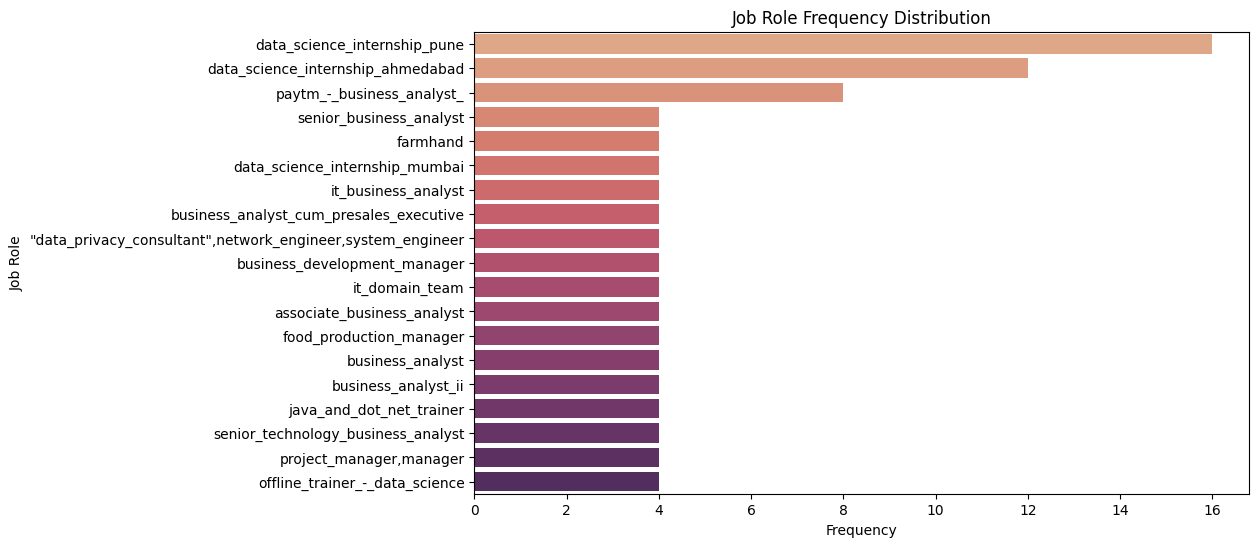

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each job role
job_role_counts = timesjobs_df['Job_Role'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=job_role_counts.values, y=job_role_counts.index, palette='flare')

# Adding labels and title
plt.xlabel('Frequency')
plt.ylabel('Job Role')
plt.title('Job Role Frequency Distribution')

# Show the plot
plt.show()

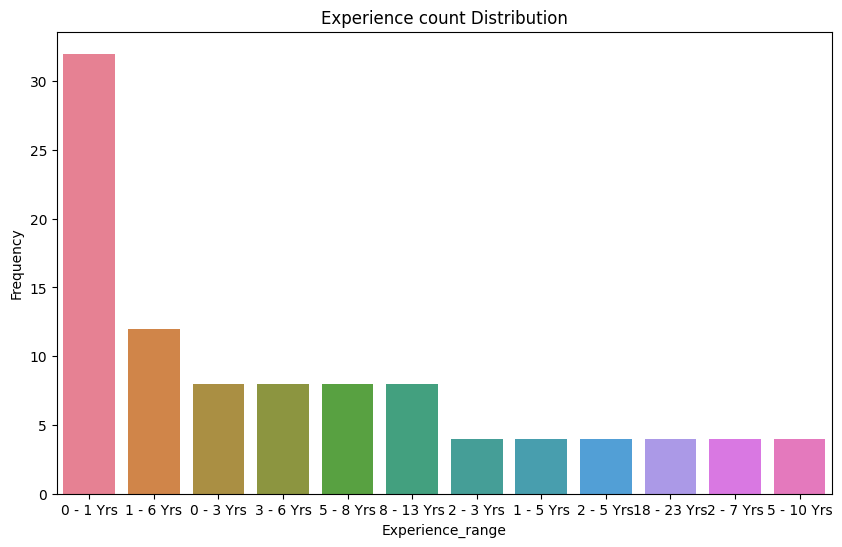

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each job role
exp_counts = timesjobs_df['Experience'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=exp_counts.index, y=exp_counts.values, palette='husl')

# Adding labels and title
plt.ylabel('Frequency')
plt.xlabel('Experience_range')
plt.title('Experience count Distribution')

# Show the plot
plt.show()

In [21]:
!pip install plotly

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Count the frequency of each job role
salary_counts = timesjobs_df['Salary_lpa'].value_counts()

# Convert the salary_counts to a DataFrame
df_salary_counts = pd.DataFrame({'Salary Range': salary_counts.index, 'Frequency': salary_counts.values})

# Sort the DataFrame by frequency in descending order
df_salary_counts = df_salary_counts.sort_values(by='Frequency', ascending=False)

# Plotting using treemap
fig = px.treemap(df_salary_counts, path=['Salary Range'], values='Frequency',
                 title='Salary Range Distribution - Treemap', color='Frequency',
                 color_continuous_scale='plasma', width=800, height=500)

# Show the plot
fig.show()

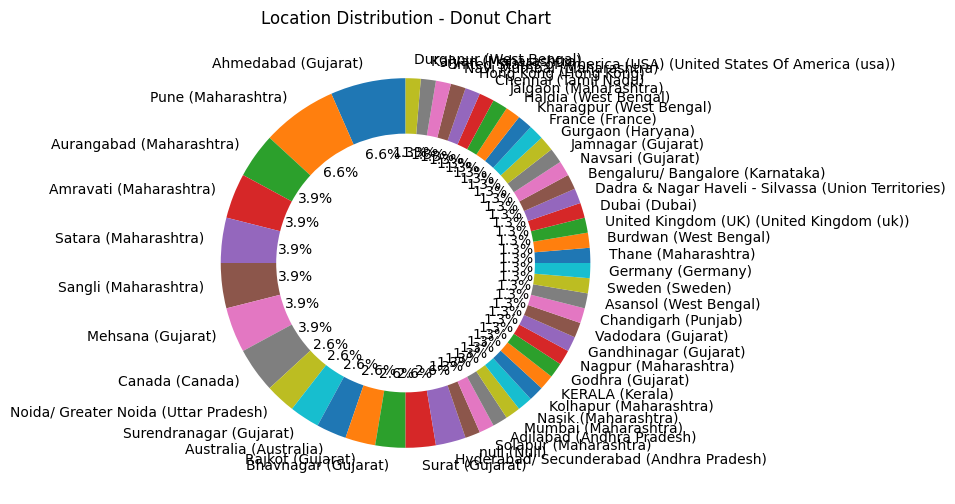

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the dictionary to a DataFrame
df_location_counts = pd.DataFrame(list(location_counts.items()), columns=['Location', 'Frequency'])

# Sort the DataFrame by frequency in descending order
df_location_counts = df_location_counts.sort_values(by='Frequency', ascending=False)

# Plotting using a donut chart
plt.figure(figsize=(10, 6))
plt.pie(df_location_counts['Frequency'], labels=df_location_counts['Location'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), colors=sns.color_palette('tab10', n_colors=len(df_location_counts)))

# Draw a white circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adding labels and title
plt.title('Location Distribution - Donut Chart')

# Show the plot
plt.show()

In [25]:
!pip install wordcloud

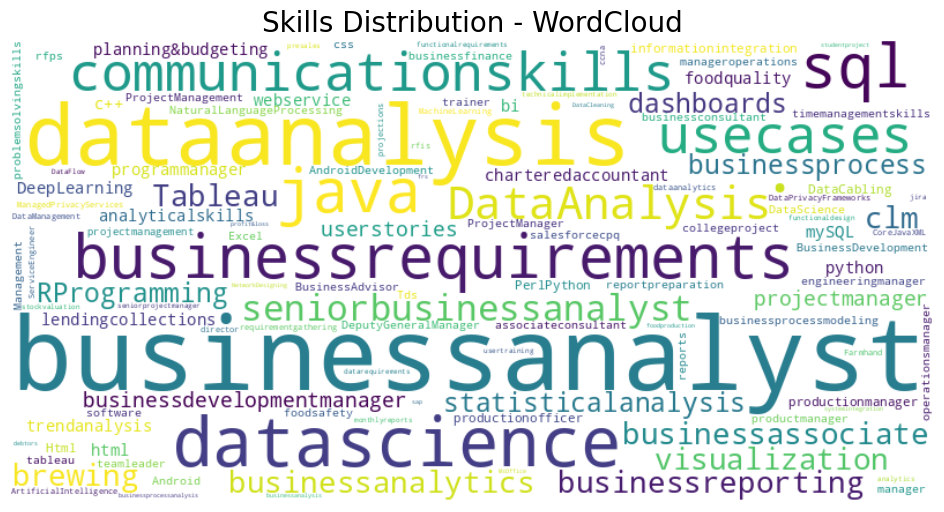

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Count the frequency of each location
skill_counts = {Skills: unique_skills.count(Skills) for Skills in set(unique_skills)}

# Generate WordCloud
wordcloud = WordCloud(width = 800, height = 400,
                      random_state=21, max_font_size=110,
                      background_color='white').generate_from_frequencies(skill_counts)

# Plotting
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

# Adding title
plt.title('Skills Distribution - WordCloud', fontsize=20)

# Show the plot
plt.show()


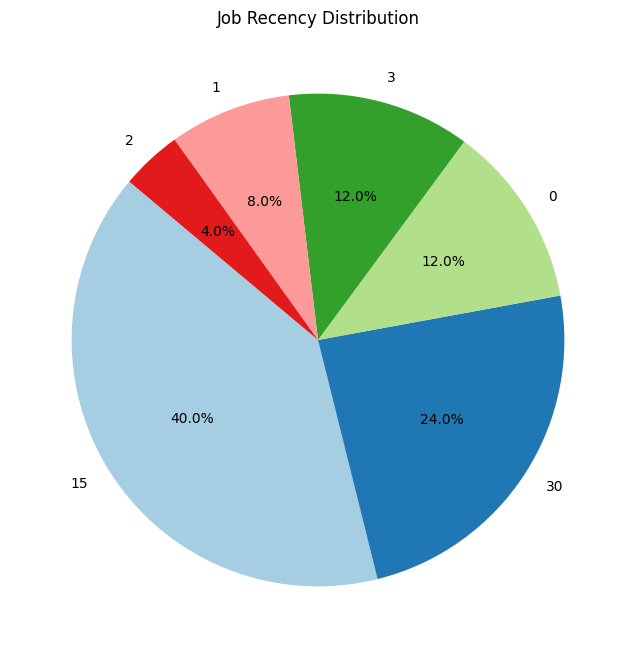

In [36]:
import matplotlib.pyplot as plt
# Count the frequency of each job role
timeago_counts = timesjobs_df['Times_Ago_days'].value_counts()
# Plotting using pie chart
plt.figure(figsize=(8, 8))
plt.pie(timeago_counts, labels=timeago_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Paired', len(timeago_counts)))

# Adding title
plt.title('Job Recency Distribution')

# Show the plot
plt.show()


## **Conclusion:**
In this project, I successfully conducted web scraping on the TimesJobs website to gather job information related to Data Science, Business Analysis, and Data Analysis. The scraping process involved extracting details such as job title, company name, experience requirements, salary ranges, locations, and required skills.

Following the web scraping, I performed Exploratory Data Analysis (EDA) on the scraped data to gain insights into the job market. Some key observations from the EDA include:


*   **Job Roles:** The available positions are diverse, including opportunities for Data Science Internships and Business Analyst roles.

*   **Experience Requirements:** Job listings have varying experience requirements, ranging from 0-1 years to 1-6 years.

*   **Salary Ranges:** The salary packages for these positions exhibit a variety, covering options such as "As per industry standards," "1 - 2 Lpa," and "1.95 - 12.00 Lpa."

*   **Job Locations:** The job locations are primarily in Ahemdabad (Gujarat) and Pune (Maharashtra).

*   **Desired Skills:** The skills in demand for these positions include proficiency in SQL and Tableau.

*   **Job Recency:** Job postings are relatively recent, with recency periods of 15 days and 30 days, indicating the time since the positions were posted.